<a href="https://colab.research.google.com/github/sprashant19/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [391]:
data=pd.read_csv("/content/UCI_Credit_Card.csv")
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


**DATA CLEANING**

In [392]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [394]:
data=data.astype({"LIMIT_BAL":"int64",'BILL_AMT1':"int64", 'BILL_AMT2':"int64",
       'BILL_AMT3':"int64", 'BILL_AMT4':"int64", 'BILL_AMT5':"int64", 'BILL_AMT6':"int64", 'PAY_AMT1':"int64",
       'PAY_AMT2':"int64", 'PAY_AMT3':"int64", 'PAY_AMT4':"int64", 'PAY_AMT5':"int64", 'PAY_AMT6':"int64"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [395]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [396]:
data=data.drop(columns=["ID"])
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [397]:
data.MARRIAGE.unique()

array([1, 2, 3, 0])

Marriage Column contains 1 as "Married",2 as "Single" and 3 as "others".

We got a Marriage data as 0, which can't be a infered as married or unmarried.So dropping those rows that got 0 as Marriage.

In [398]:
data=data.loc[data.MARRIAGE.isin([1,2,3]),:]

In [399]:
data.MARRIAGE.unique()

array([1, 2, 3])

In [400]:
data.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

(1=graduate school, 2=university, 3=high school, 4=others,
5=unknown, 6=unknown)

5 and 6 cannot be imputed so dropping those rows with 5 and 6.

In [401]:
data=data.loc[data.EDUCATION.isin([1,2,3,4]),:]

In [402]:
data.EDUCATION.unique()

array([2, 1, 3, 4])

In [403]:
data.PAY_0.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [404]:
data.PAY_0.value_counts()

 0    14499
-1     5633
 1     3662
-2     2708
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

 Repayment status in September, 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight
months, 9=payment delay for nine months and above)

Data has got a wrong value as -2 and 0, We need to delete those rows that has -2 and 0 as PAY_0 values.


In [405]:
data=data.loc[data.PAY_0.isin([-1,1,2,3,4,5,6,7,8]),:]

In [406]:
data.PAY_2.value_counts()

-1    5329
 2    3899
 0    1448
-2    1209
 3     326
 4      97
 1      28
 5      25
 7      20
 6      12
 8       1
Name: PAY_2, dtype: int64

PAY_2: Repayment status in August, 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight
months, 9=payment delay for nine months and above)


In [407]:
data=data.loc[data.PAY_2.isin([-1,1,2,3,4,5,6,7,8]),:]

In [408]:
data.PAY_3.value_counts()

-1    4490
 2    2918
 0    1504
-2     466
 3     210
 4      72
 7      27
 6      23
 5      20
 1       4
 8       3
Name: PAY_3, dtype: int64

In [409]:
data=data.loc[data.PAY_3.isin([-1,1,2,3,4,5,6,7,8]),:]

In [410]:
data.PAY_4.value_counts()

-1    3756
 2    2046
 0    1283
-2     378
 3     142
 4      62
 7      58
 5      34
 6       4
 1       2
 8       2
Name: PAY_4, dtype: int64

In [411]:
data=data.loc[data.PAY_4.isin([-1,1,2,3,4,5,6,7,8]),:]

In [412]:
data.PAY_5.value_counts()

-1    3052
 2    1466
 0    1065
-2     241
 3     131
 4      75
 7      57
 5      14
 6       4
 8       1
Name: PAY_5, dtype: int64

In [413]:
data=data.loc[data.PAY_5.isin([-1,1,2,3,4,5,6,7,8]),:]

In [414]:
data.PAY_6.value_counts()

-1    2528
 2    1262
 0     555
-2     215
 3     125
 7      46
 4      41
 6      15
 5      11
 8       2
Name: PAY_6, dtype: int64

In [415]:
data=data.loc[data.PAY_6.isin([-1,1,2,3,4,5,6,7,8]),:]

In [416]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
11,260000,2,1,2,51,-1,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
21,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
28,50000,2,3,1,47,-1,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
30,230000,2,1,2,27,-1,-1,-1,-1,-1,...,15339,14307,36923,17270,13281,15339,14307,37292,0,0
48,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018,11849,11873,21540,15138,24677,11851,11875,8251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29934,360000,1,2,1,45,-1,-1,-1,-1,-1,...,836,986,986,836,836,836,986,986,611,0
29942,130000,1,3,1,45,-1,-1,-1,-1,-1,...,2756,1585,1215,1826,2831,2756,1585,1215,2402,1
29976,40000,1,2,2,47,2,2,3,2,2,...,51259,47151,46934,4000,0,2000,0,3520,0,1
29991,210000,1,2,1,34,3,2,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1


In [417]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,...,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000
mean,171657.568238,1.591811,1.742184,1.493300,36.522084,0.183871,0.289578,0.322581,0.287593,0.246154,...,22618.342680,22590.346402,22701.868983,4654.058065,4609.700000,4719.065757,4547.375186,4605.919851,4590.067990,0.356328
std,125943.771452,0.491559,0.718360,0.516619,9.180649,1.575340,1.681448,1.738462,1.802048,1.780999,...,44947.085387,44523.318928,45530.500711,10882.895838,11979.728987,13410.749346,11093.974616,13538.101017,14952.875407,0.478973
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-3903.000000,-3876.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60000.000000,1.000000,1.000000,1.000000,29.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,832.250000,846.000000,780.000000,316.000000,316.000000,316.000000,330.500000,98.000000,0.000000,0.000000
50%,150000.000000,2.000000,2.000000,1.000000,35.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,4180.000000,4087.000000,4162.000000,1600.000000,1595.000000,1443.000000,1443.500000,1228.000000,1048.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,43.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,22900.500000,23345.500000,23999.250000,4411.750000,4395.250000,4200.000000,4100.000000,4000.000000,3710.000000,1.000000
max,740000.000000,2.000000,4.000000,3.000000,72.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,486776.000000,503914.000000,527711.000000,187206.000000,302961.000000,417588.000000,193712.000000,303512.000000,345293.000000,1.000000


**EXPLORATORY DATA ANALYSIS**

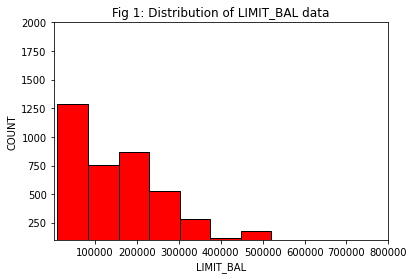

In [418]:
plt.hist(data['LIMIT_BAL'],edgecolor='black',color='red')
plt.xlabel("LIMIT_BAL")
plt.ylabel("COUNT")
plt.title("Fig 1: Distribution of LIMIT_BAL data")
plt.axis([1000,800000,100,2000])
plt.show()

From the above figure we can conclude that:

1)More than 12000 people got loans less than 100000 NT dollars.

2)Around 7000-7900 people got loans between 100000-200000 NT dollars.

3)5000 people got loans between 200000-300000 NT dollars.

4)Around 3000 people got loans between 300000-400000 NT dollars.

5)Less than 2000 people got loans between 400000-500000 NT dollars.

It can be interpreted from above histogram, more number people has got loans less than 100000 than other amounts.

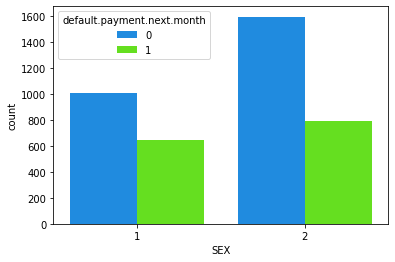

In [419]:
sns.countplot(x="SEX",hue="default.payment.next.month",palette='gist_rainbow_r',data=data)
plt.show()

Interpretation

1)Females have defaulted more than men, also they have paid the payment duly more than men.

2)This shows Female are more likely to pay the credit on time rather than  men.

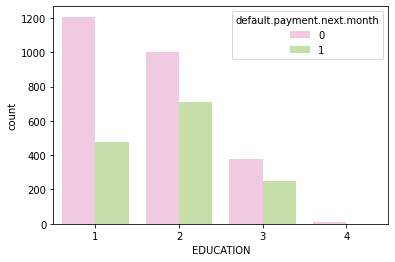

In [420]:
sns.countplot(x="EDUCATION",hue="default.payment.next.month",palette='PiYG',data=data)
plt.show()

Interpretation

1)School graduates have defaulted the payment most.

2)University graduates are more likely to pay the credit than the other literate  people.

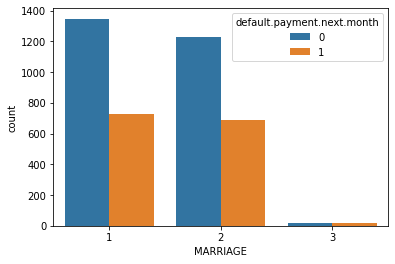

In [421]:
sns.countplot(x="MARRIAGE",hue="default.payment.next.month",data=data)
plt.show()

Interpretation

1)Married people tend to default than the single and other people.

2)Also Married people are the ones who take more credit than the single and other category people.

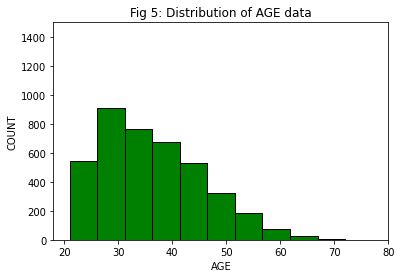

In [422]:
plt.hist(data['AGE'],edgecolor='black',color='green')
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.title("Fig 5: Distribution of AGE data")
plt.axis([18,80,0,1500])
plt.show()


Interpretation:

1)Around 1100 people were between the age of 25-35, who got the credit and were the highest number of people than the other age group.

2)less than 50 people got credit in the age group of 65-75.

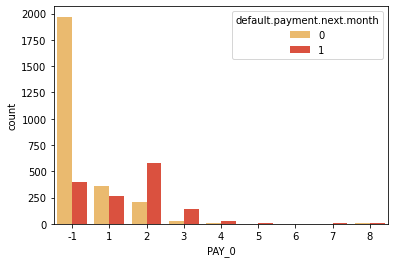

In [423]:
sns.countplot(x="PAY_0",hue="default.payment.next.month",palette='YlOrRd',data=data)
plt.show()

Interpretation

1)More than 1750 people have paid the repayment duly on time.

2)Around 600 people have defaulted which is the highest number among the defaulters,also the defaulters are those who paid the repayment in 2 months delay.

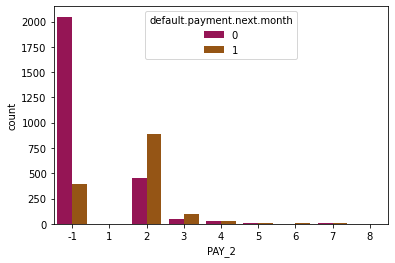

In [424]:
sns.countplot(x="PAY_2",hue="default.payment.next.month",palette='brg',data=data)
plt.show()

Interpretation

1)More than 2000 people have paid the repayment duly on time.

2)Around 800 people have defaulted which is the highest number among the defaulters,also the defaulters are those who paid the repayment in 2 months delay.

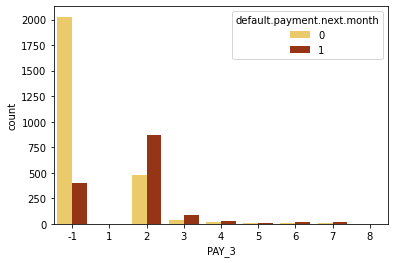

In [425]:
sns.countplot(x="PAY_3",hue="default.payment.next.month",palette='afmhot_r',data=data)
plt.show()

Interpretation

1)More than 2000 people have paid the repayment duly on time.

2)Around 800 people have defaulted which is the highest number among the defaulters,also the defaulters are those who paid the repayment in 2 months delay.

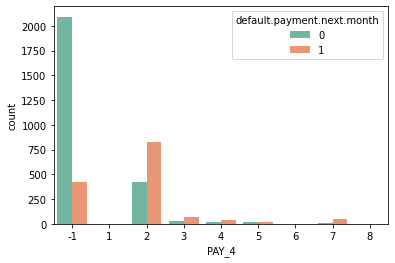

In [426]:
sns.countplot(x="PAY_4",hue="default.payment.next.month",palette='Set2',data=data)
plt.show()

Interpretation

1)More than 2000 people have paid the repayment duly on time.

2)Around 800 people have defaulted which is the highest number among the defaulters,also the defaulters are those who paid the repayment in 2 months delay.

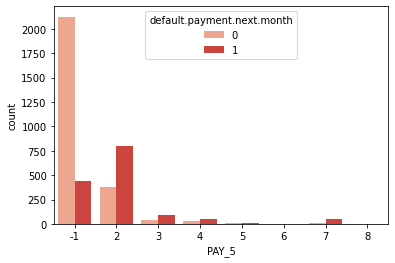

In [427]:
sns.countplot(x="PAY_5",hue="default.payment.next.month",palette='Reds',data=data)
plt.show()

Interpretation

1)More than 800 people have  highest default payment status, also the above figure shows that,there is higher chance of default if the repayement delay is of 2 months.

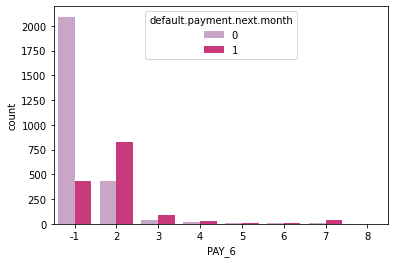

In [428]:
sns.countplot(x="PAY_6",hue="default.payment.next.month",palette='PuRd',data=data)
plt.show()

Interpretation

1)More than 800 people have highest default payment status, also the above figure shows that,there is higher chance of default if the repayement delay is of 2 months.

2)The figure shows least number of default for repayment delay of 5/6/4 months.

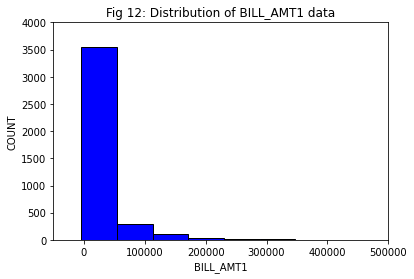

In [429]:
plt.hist(data['BILL_AMT1'],edgecolor='black',color='blue')
plt.xlabel("BILL_AMT1")
plt.ylabel("COUNT")
plt.title("Fig 12: Distribution of BILL_AMT1 data")
plt.axis([-50000,500000,0,4000])
plt.show()

Interpretation

1)Around 3500 people has less than 50000 and even has negative values as Amount of bill statement in September, 2005 (NT dollar)

2)less than 50 people has more than 300000 as Amount of bill statement in September, 2005 (NT dollar)

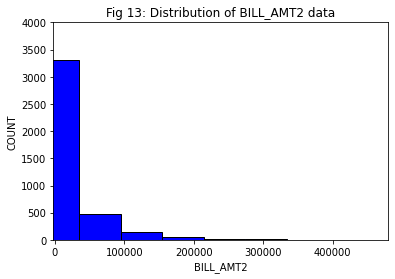

In [430]:
plt.hist(data['BILL_AMT2'],edgecolor='black',color='blue')
plt.xlabel("BILL_AMT2")
plt.ylabel("COUNT")
plt.title("Fig 13: Distribution of BILL_AMT2 data")
plt.axis([-2000,480000,0,4000])
plt.show()

Interpretation

1)Around 3250 people has less than 40000 and even has negative values as Amount of bill statement in August, 2005 (NT dollar)

2)less than 50 people has more than 300000 as Amount of bill statement in August, 2005 (NT dollar)

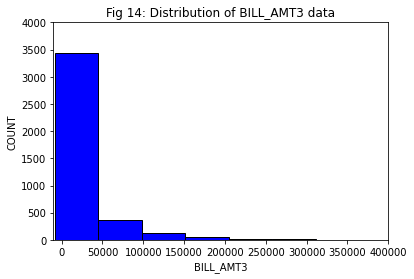

In [431]:
plt.hist(data['BILL_AMT3'],edgecolor='black',color='blue')
plt.xlabel("BILL_AMT3")
plt.ylabel("COUNT")
plt.title("Fig 14: Distribution of BILL_AMT3 data")
plt.axis([-10000,400000,0,4000])
plt.show()

Interpretation

1)Around 3400 people has less than 40000 and even has negative values as Amount of bill statement in July, 2005 (NT dollar)

2)less than 50 people has more than 250000 as Amount of bill statement in July, 2005 (NT dollar)

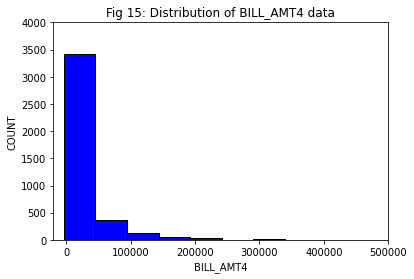

In [432]:
plt.hist(data['BILL_AMT4'],edgecolor='black',color='blue')
plt.xlabel("BILL_AMT4")
plt.ylabel("COUNT")
plt.title("Fig 15: Distribution of BILL_AMT4 data")
plt.axis([-20000,500000,0,4000])
plt.show()

Interpretation

1)Around 3400 people has less than 10000 and even has negative values as Amount of bill statement in June, 2005 (NT dollar)

2)less than 50 people has more than 250000 as Amount of bill statement in June, 2005 (NT dollar)

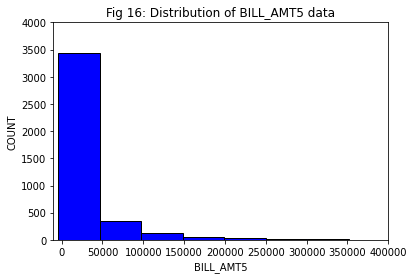

In [433]:
plt.hist(data['BILL_AMT5'],edgecolor='black',color='blue')
plt.xlabel("BILL_AMT5")
plt.ylabel("COUNT")
plt.title("Fig 16: Distribution of BILL_AMT5 data")
plt.axis([-10000,400000,0,4000])
plt.show()

Interpretation

1)Around 3400 people has less than 10000 and even has negative values as Amount of bill statement in May, 2005 (NT dollar)

2)less than 50 people has more than 300000 as Amount of bill statement in May, 2005 (NT dollar)

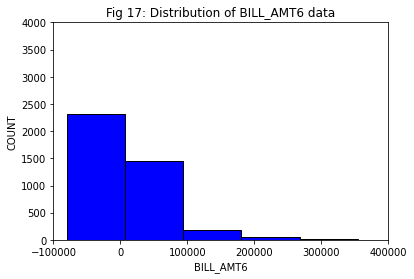

In [434]:
plt.hist(data['BILL_AMT6'],edgecolor='black',color='blue')
plt.xlabel("BILL_AMT6")
plt.ylabel("COUNT")
plt.title("Fig 17: Distribution of BILL_AMT6 data")
plt.axis([-100000,400000,0,4000])
plt.show()

Interpretation

1)Around 2400 people has less than 10000 and even has negative values as Amount of bill statement in April, 2005 (NT dollar)

2)less than 50 people has more than 300000 as Amount of bill statement in April, 2005 (NT dollar)

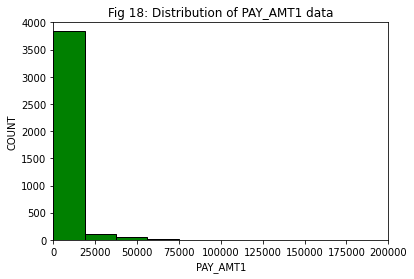

In [435]:
plt.hist(data['PAY_AMT1'],edgecolor='black',color='green')
plt.xlabel("PAY_AMT1")
plt.ylabel("COUNT")
plt.title("Fig 18: Distribution of PAY_AMT1 data")
plt.axis([0,200000,0,4000])
plt.show()

Interpretation

1)More than 3500 people had paid the amount between 0 to 20000 NT dollars as previous payment in September 2005..

2)Around 2-3 people had paid the amount more than 50000 NT dollars as previous payment in September 2005.

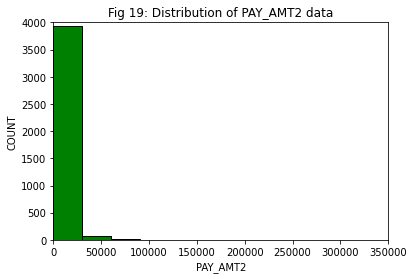

In [436]:
plt.hist(data['PAY_AMT2'],edgecolor='black',color='green')
plt.xlabel("PAY_AMT2")
plt.ylabel("COUNT")
plt.title("Fig 19: Distribution of PAY_AMT2 data")
plt.axis([0,350000,0,4000])
plt.show()

Interpretation

1)More than 3500 people had paid the amount between 0 to 20000 NT dollars as previous payment in August 2005..

2)Around 2-3 people had paid the amount more than 50000 NT dollars as previous payment in August 2005.

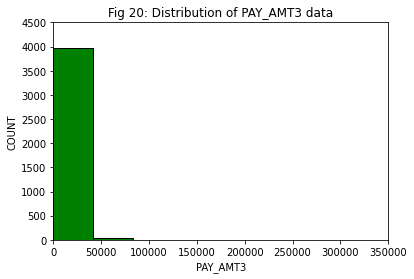

In [437]:
plt.hist(data['PAY_AMT3'],edgecolor='black',color='green')
plt.xlabel("PAY_AMT3")
plt.ylabel("COUNT")
plt.title("Fig 20: Distribution of PAY_AMT3 data")
plt.axis([0,350000,0,4500])
plt.show()

Interpretation

1)4000 people had paid the amount between 0 to 20000 NT dollars as previous payment in July 2005..

2)Around 2-3 people had paid the amount more than 50000 NT dollars as previous payment in July 2005.

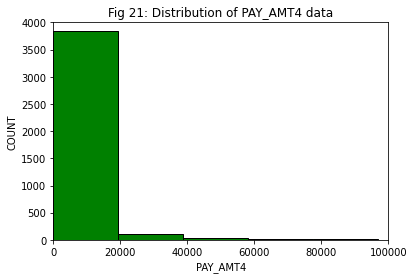

In [438]:
plt.hist(data['PAY_AMT4'],edgecolor='black',color='green')
plt.xlabel("PAY_AMT4")
plt.ylabel("COUNT")
plt.title("Fig 21: Distribution of PAY_AMT4 data")
plt.axis([0,100000,0,4000])
plt.show()

Interpretation

1)More than 3500 people had paid the amount between 0 to 20000 NT dollars as previous payment in June 2005..

2)Around 2-3 people had paid the amount more than 80000 NT dollars as previous payment in June 2005.

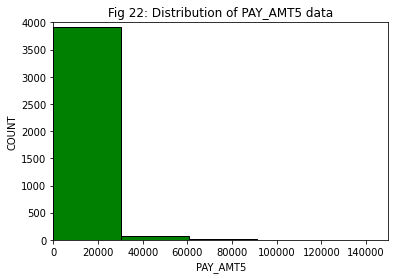

In [439]:
plt.hist(data['PAY_AMT5'],edgecolor='black',color='green')
plt.xlabel("PAY_AMT5")
plt.ylabel("COUNT")
plt.title("Fig 22: Distribution of PAY_AMT5 data")
plt.axis([0,150000,0,4000])
plt.show()

Interpretation

1)More than 3500 people had paid the amount between 0 to 20000 NT dollars as previous payment in May 2005..

2)Around 2-3 people had paid the amount more than 80000 NT dollars as previous payment in May 2005.

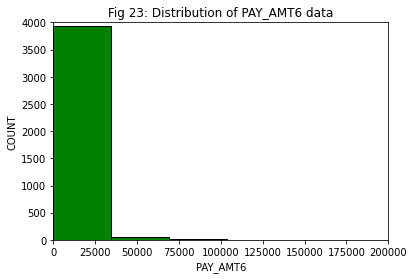

In [440]:
plt.hist(data['PAY_AMT6'],edgecolor='black',color='green')
plt.xlabel("PAY_AMT6")
plt.ylabel("COUNT")
plt.title("Fig 23: Distribution of PAY_AMT6 data")
plt.axis([0,200000,0,4000])
plt.show()

Interpretation

1)More than 3500 people had paid the amount between 0 to 20000 NT dollars as previous payment in April 2005..

2)Around 2-3 people had paid the amount more than 75000 NT dollars as previous payment in April 2005.

In [441]:
x=data["default.payment.next.month"].value_counts()
y=[0,1]
fig=go.Figure(data=[go.Pie(values=x,labels=y,text=["Defaulted","Not Defaulted"],title="<b>Fig 24: Distribution of Default payment data")])
fig.show()

Interpetation

1)Around 65% people defaulted the payment next month

2)Almost 35% people not defaulted the payment next month.

Preparing the data

In [442]:
x=data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values
y=data["default.payment.next.month"].values

Data Splitting

In [443]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Data Scaling

In [444]:
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

**MODEL TRAINING**

**LOGISTIC REGRESSION MODEL**

In [445]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [446]:
log_reg.predict(x_test_scaled)

array([0, 1, 1, ..., 0, 1, 1])

In [447]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted':log_reg.predict(x_test_scaled)})
df_pred

,Actual,Predicted
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
1003,1,0
1004,0,0
1005,0,0
1006,1,1


In [448]:
y_test_prediction=log_reg.predict(x_test_scaled)
y_test_prediction

array([0, 1, 1, ..., 0, 1, 1])

In [449]:
y_pred_proba=log_reg.predict_log_proba(x_test_scaled)
y_pred_proba

array([[-0.09611048, -2.38992727],
       [-2.34953625, -0.10027724],
       [-0.85523556, -0.55370359],
       ...,
       [-0.23142188, -1.57699334],
       [-1.18312013, -0.36574666],
       [-1.2307763 , -0.34540407]])

Evaluation Metrics

In [450]:
roc_auc_score(y_test,log_reg.predict_log_proba(x_test_scaled)[:,1])

0.8174859410900996

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



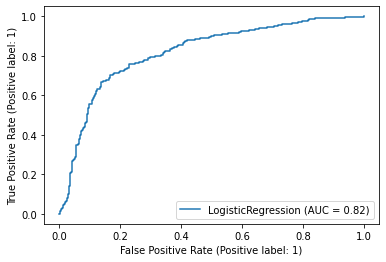

In [451]:
plot_roc_curve(log_reg, x_test_scaled, y_test)

Confusion Matrix

In [452]:
cnf_matrix = confusion_matrix(y_test, log_reg.predict(x_test_scaled))
cnf_matrix

array([[548,  89],
       [123, 248]])

LOGISTIC REGRESSION FEATURE SELECTION

In [453]:
estimator=LogisticRegression()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=4)
sfs.fit(x_train_scaled,y_train)
list(zip(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],sfs.get_support()))

[('LIMIT_BAL', False),
 ('SEX', False),
 ('EDUCATION', True),
 ('MARRIAGE', False),
 ('AGE', False),
 ('PAY_0', False),
 ('PAY_2', True),
 ('PAY_3', False),
 ('PAY_4', False),
 ('PAY_5', True),
 ('PAY_6', False),
 ('BILL_AMT1', False),
 ('BILL_AMT2', False),
 ('BILL_AMT3', False),
 ('BILL_AMT4', False),
 ('BILL_AMT5', False),
 ('BILL_AMT6', False),
 ('PAY_AMT1', False),
 ('PAY_AMT2', False),
 ('PAY_AMT3', True),
 ('PAY_AMT4', False),
 ('PAY_AMT5', False),
 ('PAY_AMT6', False)]

**K-NEAREST NEIGHBOR MODEL**

In [454]:
kn_clf=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kn_clf.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [455]:
y_pred_kn=kn_clf.predict(x_test_scaled)
y_pred_kn

array([0, 1, 0, ..., 0, 1, 1])

In [456]:
df_kn=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_kn})
df_kn

,Actual,Predicted
0,0,0
1,0,1
2,1,0
3,1,1
4,0,1
...,...,...
1003,1,1
1004,0,0
1005,0,0
1006,1,1


In [457]:
kn_proba=kn_clf.predict_proba(x_test_scaled)
kn_proba

array([[1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       ...,
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ]])

Evaluation Metrics

In [458]:
roc_auc_score(y_test,kn_proba[:,1])

0.7702251541296594

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



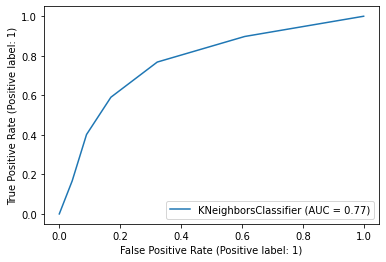

In [459]:
plot_roc_curve(kn_clf,x_test_scaled,y_test)

Confusion Metrics

In [460]:
cnf_matrix = confusion_matrix(y_test,kn_clf.predict(x_test_scaled))
cnf_matrix

array([[529, 108],
       [152, 219]])

K-NEAREST NEIGHBOR FEATURE IMPORTANCE

In [461]:
estimator=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
sfs=SequentialFeatureSelector(estimator,n_features_to_select=4)
sfs.fit(x_train_scaled,y_train)
list(zip(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],sfs.get_support()))

[('LIMIT_BAL', False),
 ('SEX', False),
 ('EDUCATION', False),
 ('MARRIAGE', False),
 ('AGE', False),
 ('PAY_0', True),
 ('PAY_2', True),
 ('PAY_3', False),
 ('PAY_4', True),
 ('PAY_5', True),
 ('PAY_6', False),
 ('BILL_AMT1', False),
 ('BILL_AMT2', False),
 ('BILL_AMT3', False),
 ('BILL_AMT4', False),
 ('BILL_AMT5', False),
 ('BILL_AMT6', False),
 ('PAY_AMT1', False),
 ('PAY_AMT2', False),
 ('PAY_AMT3', False),
 ('PAY_AMT4', False),
 ('PAY_AMT5', False),
 ('PAY_AMT6', False)]

**NAIVE BAYES MODEL**

In [462]:
classifier=GaussianNB()
classifier.fit(x_train_scaled,y_train)

GaussianNB()

In [463]:
y_pred=classifier.predict(x_test_scaled)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [464]:
y_predproba=classifier.predict_proba(x_test_scaled)
y_predproba

array([[1.00000000e+00, 5.48089017e-11],
       [3.13928801e-18, 1.00000000e+00],
       [3.03498014e-04, 9.99696502e-01],
       ...,
       [9.99231377e-01, 7.68623347e-04],
       [4.91344263e-15, 1.00000000e+00],
       [3.76046951e-06, 9.99996240e-01]])

In [465]:
dnb=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
dnb

,Actual,Predicted
0,0,0
1,0,1
2,1,1
3,1,1
4,0,1
...,...,...
1003,1,0
1004,0,0
1005,0,0
1006,1,1


Evaluation Metrics

In [466]:
auroc=roc_auc_score(y_test,y_predproba[:,1])
auroc

0.7982985439666224

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



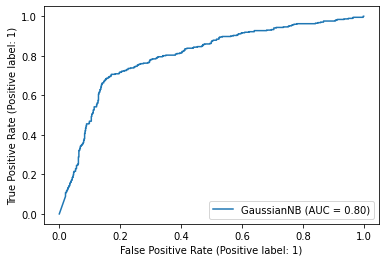

In [467]:
plot_roc_curve(classifier,x_test_scaled,y_test)

Confusion Matrix

In [468]:
cnf_matrix = confusion_matrix(y_test,classifier.predict(x_test_scaled))
cnf_matrix

array([[531, 106],
       [113, 258]])

NAIVE BAYES FEATURE IMPORTANCE

In [469]:
estimator=GaussianNB()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=4)
sfs.fit(x_train_scaled,y_train)
list(zip(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],sfs.get_support()))

[('LIMIT_BAL', False),
 ('SEX', True),
 ('EDUCATION', True),
 ('MARRIAGE', False),
 ('AGE', False),
 ('PAY_0', False),
 ('PAY_2', True),
 ('PAY_3', False),
 ('PAY_4', False),
 ('PAY_5', True),
 ('PAY_6', False),
 ('BILL_AMT1', False),
 ('BILL_AMT2', False),
 ('BILL_AMT3', False),
 ('BILL_AMT4', False),
 ('BILL_AMT5', False),
 ('BILL_AMT6', False),
 ('PAY_AMT1', False),
 ('PAY_AMT2', False),
 ('PAY_AMT3', False),
 ('PAY_AMT4', False),
 ('PAY_AMT5', False),
 ('PAY_AMT6', False)]

**DECISION TREE MODEL**

In [470]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=2)

In [471]:
y_preddt = dt.predict(x_test_scaled)
y_preddt

array([0, 1, 1, ..., 0, 1, 1])

In [472]:
dtproba = dt.predict_proba(x_test_scaled)
dtproba

array([[0.76      , 0.24      ],
       [0.23554302, 0.76445698],
       [0.49350649, 0.50649351],
       ...,
       [0.76      , 0.24      ],
       [0.23554302, 0.76445698],
       [0.23554302, 0.76445698]])

EVALUATION METRICS

In [473]:
roc_auc_score(y_test,dtproba[:,1])

0.8042479276595564

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



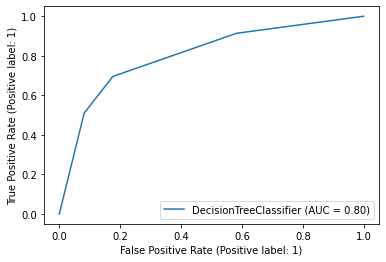

In [474]:
plot_roc_curve(dt,x_test_scaled,y_test)

CONFUSION METRICS

In [475]:
cnf_matrix = confusion_matrix(y_test, dt.predict(x_test_scaled))
cnf_matrix

array([[525, 112],
       [113, 258]])

VISUALIZATION OF DECISION TREE

[Text(0.5, 0.8333333333333334, 'X[9] <= 0.143\ngini = 0.456\nsamples = 3022\nvalue = [1957, 1065]'),
 Text(0.25, 0.5, 'X[17] <= -0.248\ngini = 0.282\nsamples = 1928\nvalue = [1600, 328]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.365\nsamples = 1025\nvalue = [779, 246]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.165\nsamples = 903\nvalue = [821, 82]'),
 Text(0.75, 0.5, 'X[5] <= 0.822\ngini = 0.44\nsamples = 1094\nvalue = [357, 737]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 385\nvalue = [190, 195]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.36\nsamples = 709\nvalue = [167, 542]')]

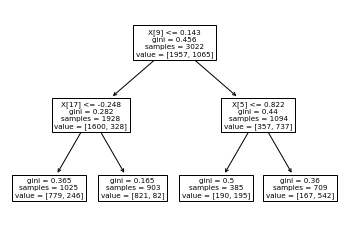

In [476]:
tree.plot_tree(dt)

DECISION TREE FEATURE IMPORTANCE

In [477]:
estimator=DecisionTreeClassifier(max_depth=2)
selector=RFE(estimator,n_features_to_select=3,step=1)
selector.fit(x_train_scaled,y_train)
list(zip(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],selector.support_))

[('LIMIT_BAL', False),
 ('SEX', False),
 ('EDUCATION', False),
 ('MARRIAGE', False),
 ('AGE', False),
 ('PAY_0', True),
 ('PAY_2', False),
 ('PAY_3', False),
 ('PAY_4', False),
 ('PAY_5', True),
 ('PAY_6', False),
 ('BILL_AMT1', False),
 ('BILL_AMT2', False),
 ('BILL_AMT3', False),
 ('BILL_AMT4', False),
 ('BILL_AMT5', False),
 ('BILL_AMT6', False),
 ('PAY_AMT1', True),
 ('PAY_AMT2', False),
 ('PAY_AMT3', False),
 ('PAY_AMT4', False),
 ('PAY_AMT5', False),
 ('PAY_AMT6', False)]

**RANDOM FOREST MODEL**

In [478]:
rf=RandomForestClassifier(n_estimators=10,max_depth=2,max_features='sqrt')
rf.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt', n_estimators=10)

In [479]:
y_predrf=rf.predict(x_test_scaled)
y_predrf

array([0, 1, 1, ..., 0, 1, 1])

In [480]:
dfrf=pd.DataFrame({"Actual":y_test,"Predicted":y_predrf})
dfrf

,Actual,Predicted
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
1003,1,0
1004,0,0
1005,0,0
1006,1,1


In [481]:
rfproba=rf.predict_proba(x_test_scaled)
rfproba

array([[0.83721355, 0.16278645],
       [0.31028161, 0.68971839],
       [0.45058961, 0.54941039],
       ...,
       [0.80139915, 0.19860085],
       [0.26400495, 0.73599505],
       [0.28100632, 0.71899368]])

EVALUATION METRICS

In [482]:
roc_auc_score(y_test,rfproba[:,1])

0.8108024051420277

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



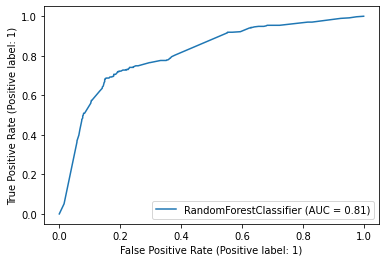

In [483]:
plot_roc_curve(rf,x_test_scaled,y_test)

CONFUSION METRICS

In [484]:
cnf_matrix = confusion_matrix(y_test,rf.predict(x_test_scaled))
cnf_matrix

array([[543,  94],
       [124, 247]])

RANDOM FOREST FEATURE IMPORTANCE

In [485]:
estimator=RandomForestClassifier(n_estimators=10,max_depth=2,max_features='sqrt')
selector=RFE(estimator,n_features_to_select=4,step=1)
selector.fit(x_train_scaled,y_train)
list(zip(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],selector.support_))

[('LIMIT_BAL', False),
 ('SEX', False),
 ('EDUCATION', False),
 ('MARRIAGE', False),
 ('AGE', False),
 ('PAY_0', True),
 ('PAY_2', True),
 ('PAY_3', False),
 ('PAY_4', True),
 ('PAY_5', True),
 ('PAY_6', False),
 ('BILL_AMT1', False),
 ('BILL_AMT2', False),
 ('BILL_AMT3', False),
 ('BILL_AMT4', False),
 ('BILL_AMT5', False),
 ('BILL_AMT6', False),
 ('PAY_AMT1', False),
 ('PAY_AMT2', False),
 ('PAY_AMT3', False),
 ('PAY_AMT4', False),
 ('PAY_AMT5', False),
 ('PAY_AMT6', False)]

**GRADIENT BOOSTING MODEL**

In [486]:
lr=[0.01,0.02,0.03,0.05,0.07,0.075,0.25,0.50,0.75,1]
for learning_rate in lr:
  gb_clf=GradientBoostingClassifier(n_estimators=100,learning_rate=learning_rate)
  gb_clf.fit(x_train_scaled,y_train)
  

In [487]:
y_predgb=gb_clf.predict(x_test_scaled)
y_predgb

array([0, 1, 0, ..., 0, 1, 1])

In [488]:
dfgb=pd.DataFrame({"Actual":y_test,"Predicted":y_predgb})
dfgb

,Actual,Predicted
0,0,0
1,0,1
2,1,0
3,1,1
4,0,0
...,...,...
1003,1,1
1004,0,0
1005,0,0
1006,1,1


In [489]:
gbproba=gb_clf.predict_proba(x_test_scaled)
gbproba

array([[9.99789133e-01, 2.10866554e-04],
       [2.23454537e-01, 7.76545463e-01],
       [7.13377442e-01, 2.86622558e-01],
       ...,
       [9.83120380e-01, 1.68796200e-02],
       [3.37454629e-03, 9.96625454e-01],
       [1.56036913e-01, 8.43963087e-01]])

EVALUATION METRIC

In [490]:
roc_auc_score(y_test,gbproba[:,1])

0.7745835219843692

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



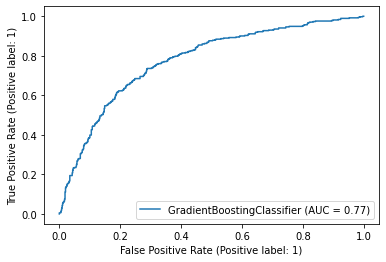

In [491]:
plot_roc_curve(gb_clf,x_test_scaled,y_test)

CONFUSION MATRIX

In [492]:
cnf_matrix = confusion_matrix(y_test,gb_clf.predict(x_test_scaled))
cnf_matrix

array([[515, 122],
       [142, 229]])

GRADIENT BOOSTING FEATURE IMPORTANCE

In [493]:
estimator=GradientBoostingClassifier(n_estimators=100,learning_rate=learning_rate)
selector=RFE(estimator,n_features_to_select=4,step=1)
selector.fit(x_train_scaled,y_train)
list(zip(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],selector.support_))

[('LIMIT_BAL', False),
 ('SEX', False),
 ('EDUCATION', False),
 ('MARRIAGE', False),
 ('AGE', False),
 ('PAY_0', False),
 ('PAY_2', False),
 ('PAY_3', False),
 ('PAY_4', False),
 ('PAY_5', True),
 ('PAY_6', False),
 ('BILL_AMT1', True),
 ('BILL_AMT2', False),
 ('BILL_AMT3', False),
 ('BILL_AMT4', False),
 ('BILL_AMT5', False),
 ('BILL_AMT6', True),
 ('PAY_AMT1', True),
 ('PAY_AMT2', False),
 ('PAY_AMT3', False),
 ('PAY_AMT4', False),
 ('PAY_AMT5', False),
 ('PAY_AMT6', False)]

**XG BOOST MODEL**

In [494]:
xgb_clf=XGBClassifier(learning_rate=0.05,verbosity=0)
xgb_clf.fit(x_train_scaled,y_train)

XGBClassifier(learning_rate=0.05, verbosity=0)

In [495]:
y_predxgb=xgb_clf.predict(x_test_scaled)
y_predxgb

array([0, 1, 0, ..., 0, 1, 1])

In [496]:
df_xgb=pd.DataFrame({"Actual":y_test,"Predicted":y_predxgb})
df_xgb

,Actual,Predicted
0,0,0
1,0,1
2,1,0
3,1,1
4,0,0
...,...,...
1003,1,0
1004,0,0
1005,0,0
1006,1,1


In [497]:
xgb_proba=xgb_clf.predict_proba(x_test_scaled)

EVALUATION METRIC

In [498]:
roc_auc_score(y_test,xgb_proba[:,1])

0.8282231822855619

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



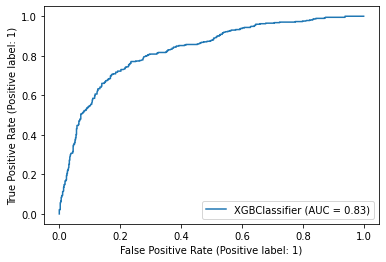

In [499]:
plot_roc_curve(xgb_clf,x_test_scaled,y_test)

CONFUSION MATRIX

In [500]:
cnf_matrix = confusion_matrix(y_test,xgb_clf.predict(x_test_scaled))
cnf_matrix

array([[552,  85],
       [133, 238]])

XG BOOST FEATURE IMPORTANCE

In [501]:
print("AUROC Score of XG boost model : ",roc_auc_score(y_test,xgb_proba[:,1]))
print("AUROC Score of Gradient Boosting model : ",roc_auc_score(y_test,gbproba[:,1]))
print("AUROC Score of Random Forest model : ",roc_auc_score(y_test,rfproba[:,1]))
print("AUROC Score of Decision Tree model : ",roc_auc_score(y_test,dtproba[:,1]))
print("AUROC Score of Naive Bayes model : ",roc_auc_score(y_test,classifier.predict_proba(x_test_scaled)[:,1]))
print("AUROC Score of K-Nearest Neighbor model : ",roc_auc_score(y_test,kn_proba[:,1]))
print("AUROC Score of Logistic Regression model : ",roc_auc_score(y_test,log_reg.predict_log_proba(x_test_scaled)[:,1]))

AUROC Score of XG boost model :  0.8282231822855619
AUROC Score of Gradient Boosting model :  0.7745835219843692
AUROC Score of Random Forest model :  0.8108024051420277
AUROC Score of Decision Tree model :  0.8042479276595564
AUROC Score of Naive Bayes model :  0.7982985439666224
AUROC Score of K-Nearest Neighbor model :  0.7702251541296594
AUROC Score of Logistic Regression model :  0.8174859410900996


Among the above trained models, XG Boost model has the highest AUROC score i.e 0.83, which shows it as the best model among all.

In [502]:
estimator=XGBClassifier(learning_rate=0.05,verbosity=0)
selector=RFE(estimator,n_features_to_select=5,step=1)
selector.fit(x_train_scaled,y_train)
list(zip(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],selector.support_))

[('LIMIT_BAL', False),
 ('SEX', False),
 ('EDUCATION', False),
 ('MARRIAGE', False),
 ('AGE', False),
 ('PAY_0', True),
 ('PAY_2', True),
 ('PAY_3', True),
 ('PAY_4', False),
 ('PAY_5', True),
 ('PAY_6', True),
 ('BILL_AMT1', False),
 ('BILL_AMT2', False),
 ('BILL_AMT3', False),
 ('BILL_AMT4', False),
 ('BILL_AMT5', False),
 ('BILL_AMT6', False),
 ('PAY_AMT1', False),
 ('PAY_AMT2', False),
 ('PAY_AMT3', False),
 ('PAY_AMT4', False),
 ('PAY_AMT5', False),
 ('PAY_AMT6', False)]

Considering the feature importance of XG Boost model, Repayment status from April 2005 to September 2005, except June 2005 are the most important features.
'PAY_0','PAY_2','PAY_3','PAY_5','PAY_6' are the strongest predictors of default payment